In [1]:
# Import fundamental packages
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# Mount the Google Drive into Colab to use the drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# The location of the csv file in Google Drive
csv_location = './drive/MyDrive/house_4/' 

In [4]:
sorted(os.listdir(csv_location))

['channel_1.csv',
 'channel_2.csv',
 'channel_3.csv',
 'channel_4.csv',
 'channel_5.csv',
 'channel_6.csv']

In [5]:
dataframes = []
for filename in sorted(os.listdir(csv_location)):
  # if filename == 'channel_1.csv': continue
  dataframe = pd.read_csv(csv_location+'/'+filename)
  dataframe.columns = ['timestamp', 'load_consumption']
  dataframe["timestamp"] = pd.to_datetime(dataframe["timestamp"],unit='s')
  dataframe = dataframe.set_index("timestamp")
  dataframes.append(dataframe)

In [6]:
for dataframe in dataframes:
  print(dataframe.info)

<bound method DataFrame.info of                      load_consumption
timestamp                            
2013-03-09 14:40:13               625
2013-03-09 14:40:19               625
2013-03-09 14:40:25               622
2013-03-09 14:40:32               641
2013-03-09 14:40:38               633
...                               ...
2013-10-01 05:14:43               266
2013-10-01 05:14:49               270
2013-10-01 05:14:55               272
2013-10-01 05:15:01               268
2013-10-01 05:15:07               270

[2186445 rows x 1 columns]>
<bound method DataFrame.info of                      load_consumption
timestamp                            
2013-03-09 14:40:19                13
2013-03-09 14:40:25                13
2013-03-09 14:40:31                13
2013-03-09 14:40:37                13
2013-03-09 14:40:43                13
...                               ...
2013-10-01 05:14:43                15
2013-10-01 05:14:49                15
2013-10-01 05:14:55              

# Plot the full dataframe

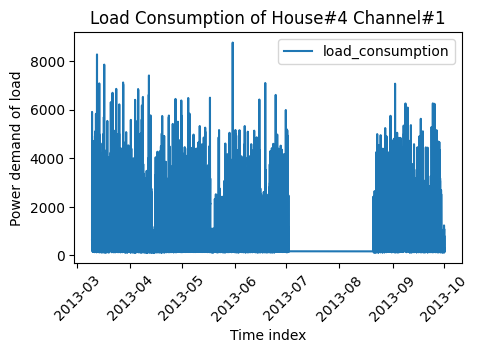

2186445


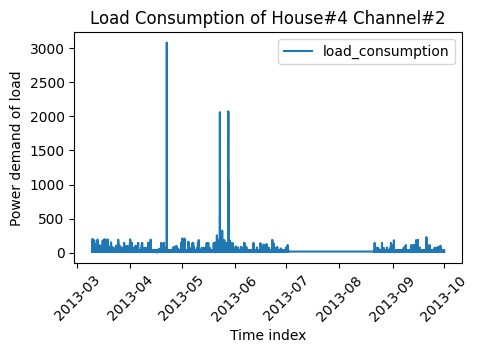

2156166


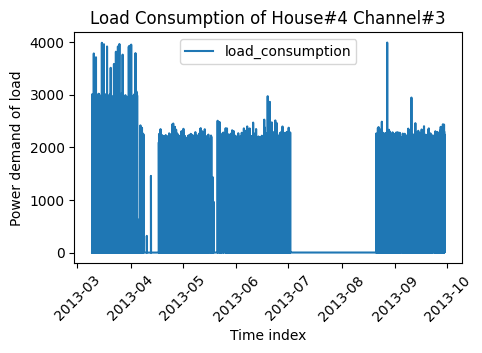

2171769


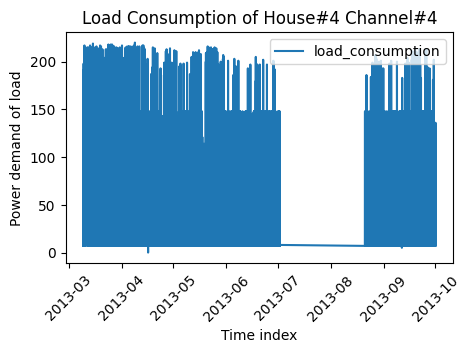

2198130


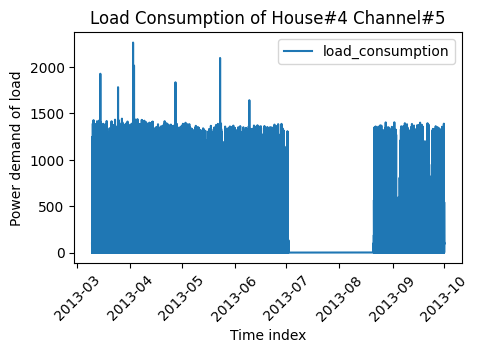

2194863


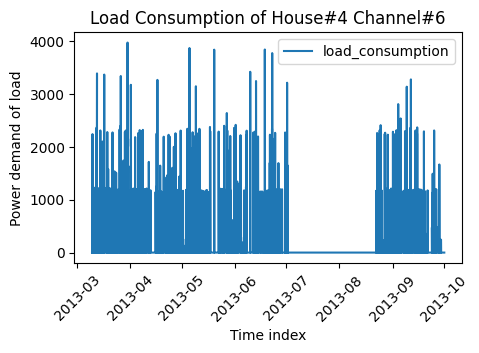

2180829


In [7]:
for i in range(6):
  # Plotting the consumption over time graph
  index = i
  current_in_hand_data_working=(dataframes[index])
  plt.figure(figsize=(5,3))
  g = sns.lineplot(data=current_in_hand_data_working)
  g.set_title('Load Consumption of House#4 Channel#'+str(index+1))
  g.set_xlabel('Time index')
  g.set_ylabel('Power demand of load')
  g.tick_params(axis='x', labelrotation=45)
  plt.show()
  print(len(current_in_hand_data_working))

# Finding the Missing data handle graphs


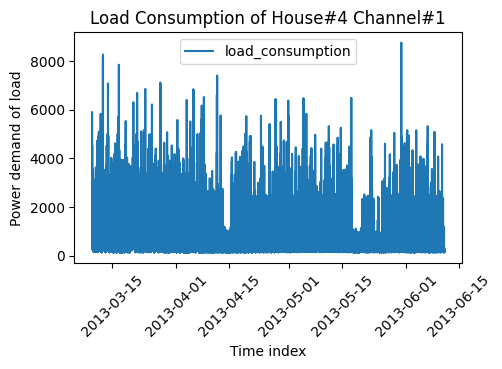

1311867


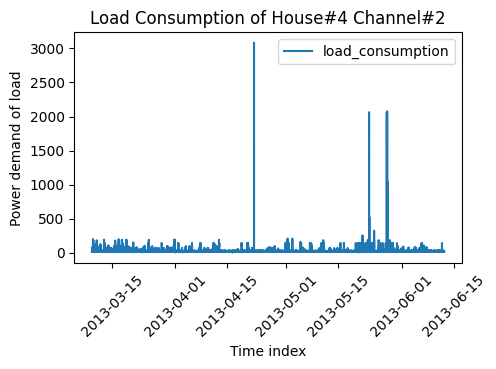

1293699


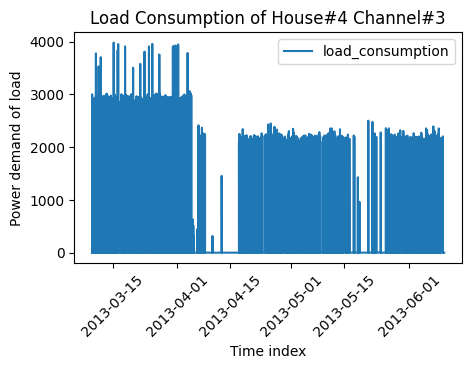

1303061


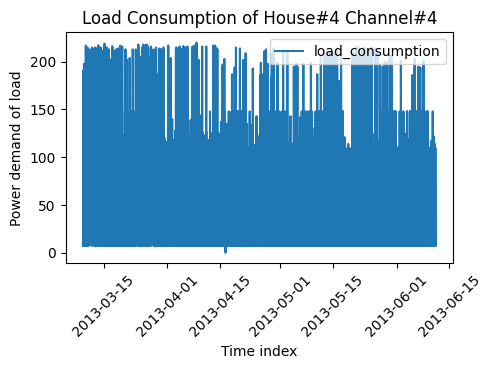

1318878


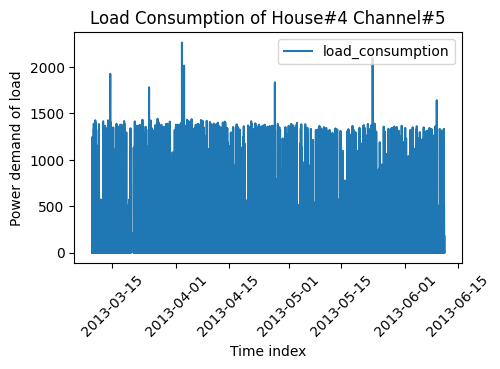

1316917


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


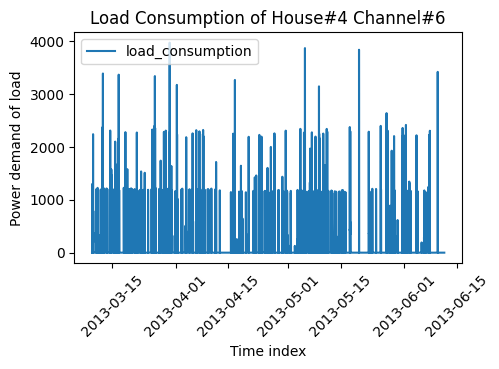

1308497


In [8]:
for i in range(6):
  # Plotting the consumption over time graph
  index = i
  current_in_hand_data_working=(dataframes[index]
   [:int(len(dataframes[index])*0.6)])
  plt.figure(figsize=(5,3))
  g = sns.lineplot(data=current_in_hand_data_working)
  g.set_title('Load Consumption of House#4 Channel#'+str(index+1))
  g.set_xlabel('Time index')
  g.set_ylabel('Power demand of load')
  g.tick_params(axis='x', labelrotation=45)
  plt.show()
  print(len(current_in_hand_data_working))

# Resampling 

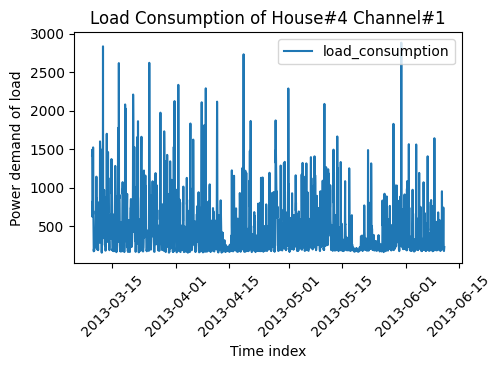

2246


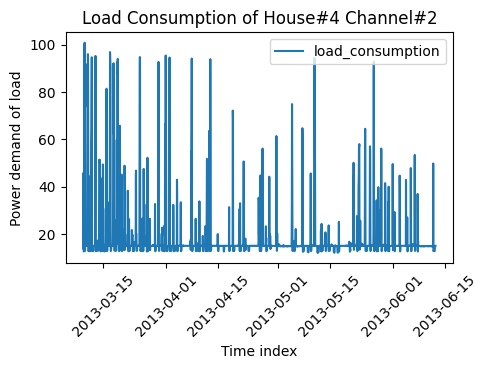

2279


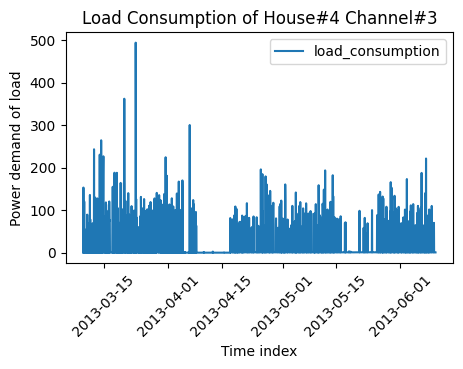

2225


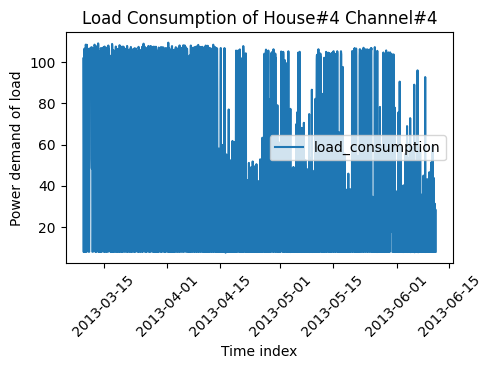

2251


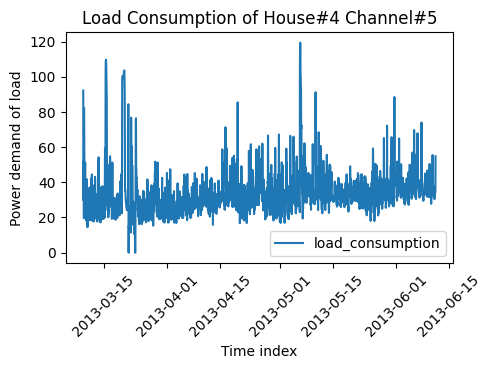

2253


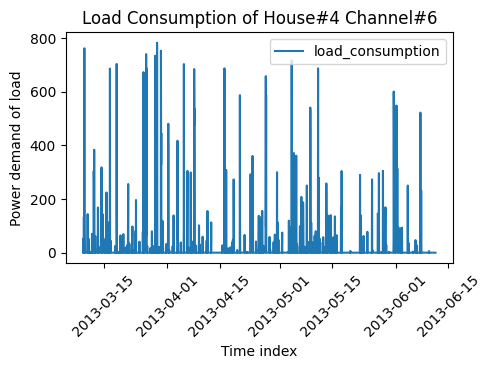

2259


In [9]:
for i in range(6):
  # Plotting the consumption over time graph
  index = i
  resample_rule='1H'
  current_in_hand_data_working=(dataframes[index]
   [:int(len(dataframes[index])*0.6)]).resample(resample_rule).mean()
  plt.figure(figsize=(5,3))
  g = sns.lineplot(data=current_in_hand_data_working)
  g.set_title('Load Consumption of House#4 Channel#'+str(index+1))
  g.set_xlabel('Time index')
  g.set_ylabel('Power demand of load')
  g.tick_params(axis='x', labelrotation=45)
  plt.show()
  print(len(current_in_hand_data_working))

# Finding out resampling data points reduction

In [10]:
resampling_sample_rates = ['1H', '6H', '12H', '24H']
for sample_rate in resampling_sample_rates:
  for i in range(6):
    index = i
    resample_rule=sample_rate
    current_in_hand_data_working=(dataframes[index][:int(len(dataframes[index])*0.6)]).resample(resample_rule).mean()
    print('sample_rate:', resample_rule, f'channel#{i+1}','datapoints:',len(current_in_hand_data_working))
  
  print("")

sample_rate: 1H channel#1 datapoints: 2246
sample_rate: 1H channel#2 datapoints: 2279
sample_rate: 1H channel#3 datapoints: 2225
sample_rate: 1H channel#4 datapoints: 2251
sample_rate: 1H channel#5 datapoints: 2253
sample_rate: 1H channel#6 datapoints: 2259

sample_rate: 6H channel#1 datapoints: 375
sample_rate: 6H channel#2 datapoints: 381
sample_rate: 6H channel#3 datapoints: 372
sample_rate: 6H channel#4 datapoints: 376
sample_rate: 6H channel#5 datapoints: 376
sample_rate: 6H channel#6 datapoints: 377

sample_rate: 12H channel#1 datapoints: 188
sample_rate: 12H channel#2 datapoints: 191
sample_rate: 12H channel#3 datapoints: 186
sample_rate: 12H channel#4 datapoints: 188
sample_rate: 12H channel#5 datapoints: 188
sample_rate: 12H channel#6 datapoints: 189

sample_rate: 24H channel#1 datapoints: 95
sample_rate: 24H channel#2 datapoints: 96
sample_rate: 24H channel#3 datapoints: 94
sample_rate: 24H channel#4 datapoints: 95
sample_rate: 24H channel#5 datapoints: 95
sample_rate: 24H ch

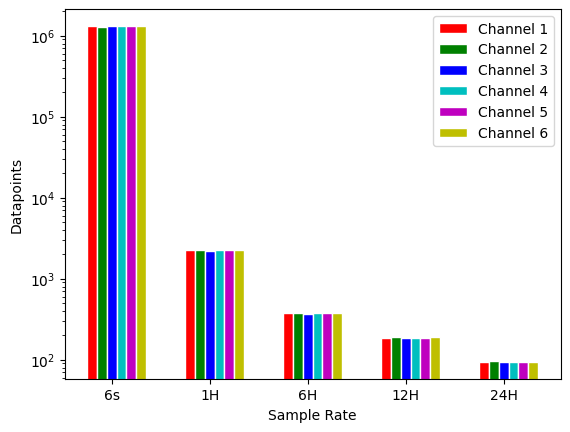

In [11]:
# Define the data
sample_rates = ['6s', '1H', '6H', '12H', '24H']
channel1_datapoints = [1311867, 2246, 375, 188, 95]
channel2_datapoints = [1293699, 2279, 381, 191, 96]
channel3_datapoints = [1303061, 2225, 372, 186, 94]
channel4_datapoints = [1318878, 2251, 376, 188, 95]
channel5_datapoints = [1316917, 2253, 376, 188, 95]
channel6_datapoints = [1308497, 2259, 377, 189, 95]

# Set the width of the bars
barWidth = 0.1

# Set the position of the bars on the x-axis
r1 = [x for x in range(len(sample_rates))]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Create the bar chart
plt.bar(r1, channel1_datapoints, color='r', width=barWidth, edgecolor='white', label='Channel 1')
plt.bar(r2, channel2_datapoints, color='g', width=barWidth, edgecolor='white', label='Channel 2')
plt.bar(r3, channel3_datapoints, color='b', width=barWidth, edgecolor='white', label='Channel 3')
plt.bar(r4, channel4_datapoints, color='c', width=barWidth, edgecolor='white', label='Channel 4')
plt.bar(r5, channel5_datapoints, color='m', width=barWidth, edgecolor='white', label='Channel 5')
plt.bar(r6, channel6_datapoints, color='y', width=barWidth, edgecolor='white', label='Channel 6')

# Add xticks on the middle of the group bars
plt.xlabel('Sample Rate')
plt.ylabel('Datapoints')
plt.yscale('log')
plt.xticks([r + 2*barWidth for r in range(len(sample_rates))], sample_rates)

# Create a legend & Show graphic
plt.legend()
plt.show()

# Lets find out the seasonal decompose graph

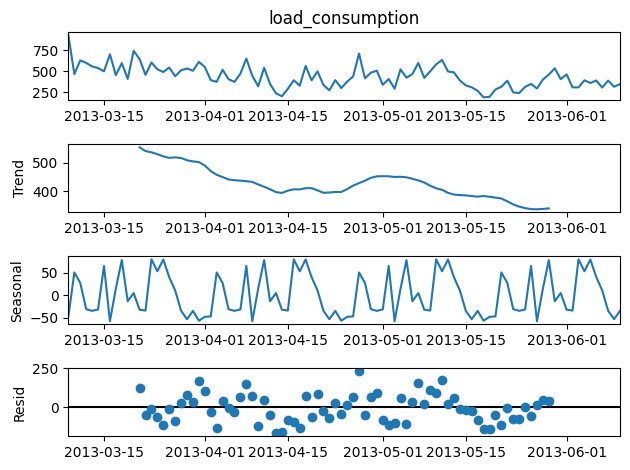

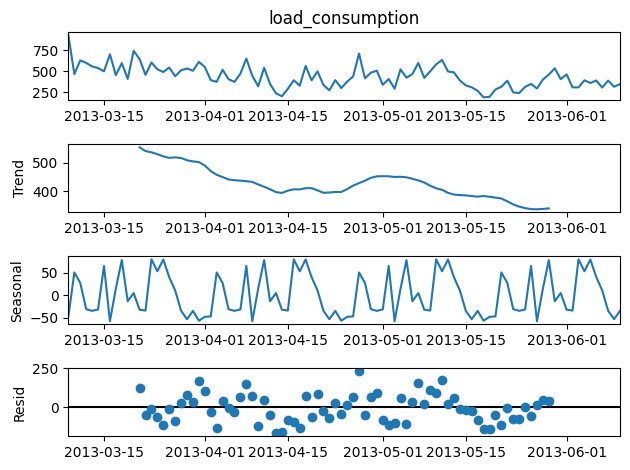

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

result = seasonal_decompose(dataframes[0]
 [:int(len(dataframes[index])*0.6)].resample('24H').mean()
 ['load_consumption'],period=24)

# Plot
result.plot()

# Finding the ACF and PACF

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


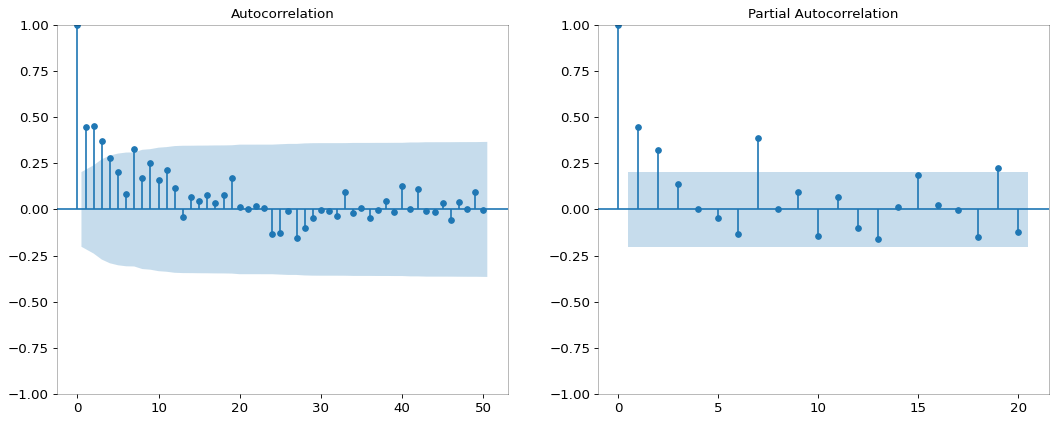

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
df = dataframes[0][:int(len(dataframes[index])*0.6)].resample('24H').mean()['load_consumption']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df, ax=ax1, lags=50)
plot_pacf(df, ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

# Finding out the Pie Charts monthwise

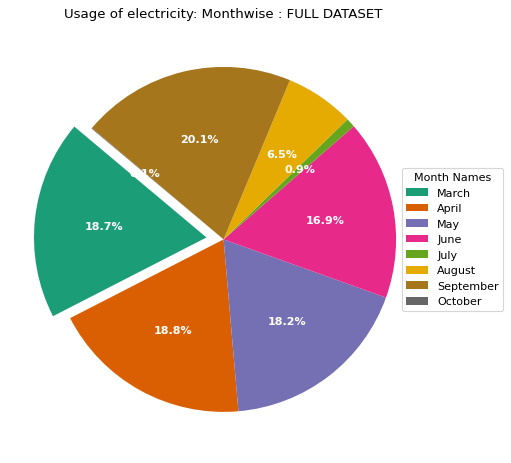

In [14]:
# Prepare Data
df = dataframes[0].resample('M').sum()

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['load_consumption']
categories = df.index.month_name()
explode = [0.1,0,0,0,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Month Names", loc="center left", 
          bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Usage of electricity: Monthwise : FULL DATASET")
plt.show()

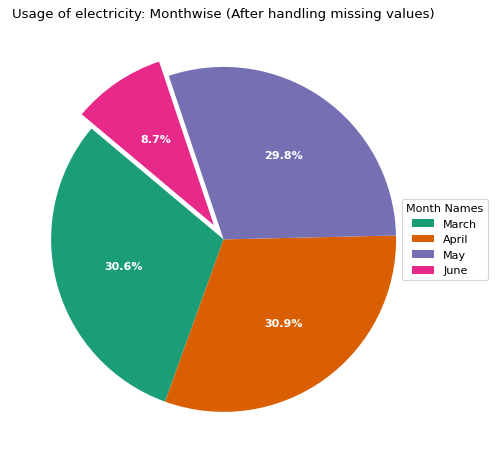

In [15]:
# Prepare Data
df = dataframes[0][:int(len(dataframes[index])*0.6)].resample('M').sum()

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['load_consumption']
categories = df.index.month_name()
explode = [0,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Month Names", loc="center left", 
          bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Usage of electricity: Monthwise (After handling missing values)")
plt.show()

# Plotting the every channel into a single plot

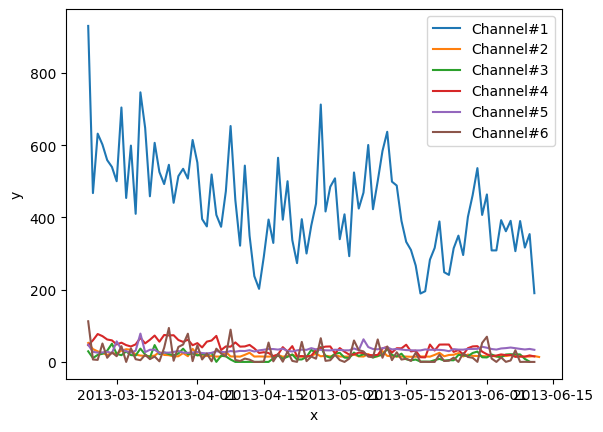

In [16]:
# Create a figure and axis object
fig, ax = plt.subplots()

for i in range(6):
  # Plotting the consumption over time graph
  index = i
  current_in_hand_data_working=(dataframes[index]
   [:int(len(dataframes[index])*0.6)]).resample('24H').mean()
   
  # Plot the three lines on the same plot
  ax.plot(current_in_hand_data_working.index, current_in_hand_data_working
   ['load_consumption'], label=f'Channel#{i+1}')

# Add legend, x-label, and y-label
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

# Finding out the avg weekly behaviour

<ipython-input-17-e59795a25952>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days_of_week)


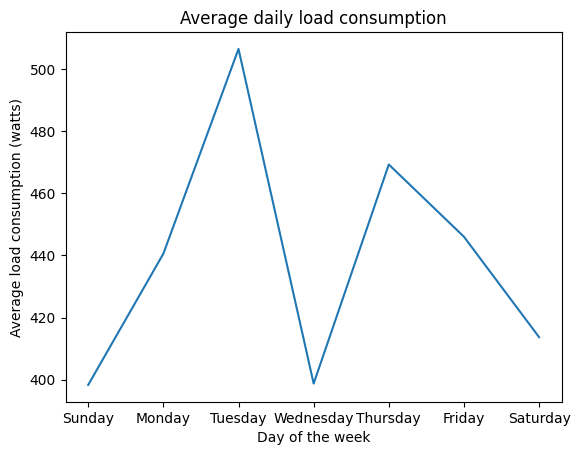

In [17]:
# Resample the data to daily frequency and compute the average load consumption for each day
df_daily = (dataframes[0][:int(len(dataframes[index])*0.6)]).resample('24H').mean()

# Create a new column with the name of the day of the week
df_daily['day'] = df_daily.index.day_name()

# Group the data by the day of the week and compute the average load consumption for each day of the week
df_grouped = df_daily.groupby('day').mean()

# Define the x-axis ticks as the days of the week
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the plot using matplotlib
fig, ax = plt.subplots()
ax.plot(df_grouped.index, df_grouped['load_consumption'])
ax.set_xticklabels(days_of_week)
ax.set_xlabel('Day of the week')
ax.set_ylabel('Average load consumption (watts)')
ax.set_title('Average daily load consumption')
plt.show()

In [18]:
daily_data.index.min()

NameError: ignored

In [ ]:
# Resample the data to daily frequency and compute the average load consumption for each day
df_daily = (dataframes[0][:int(len(dataframes[index])*0.6)]).resample('D').mean()

daily_data = df_daily

# assuming your data frame is called 'df'
daily_data.index = daily_data.index.date  # convert timestamp index to date index


# Set the x-ticks to the days of the month
days = pd.date_range(start=daily_data.index.min(), end=daily_data.index.max(), freq='D').day
xticks = range(1, max(days) + 1)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(days, daily_data['load_consumption'])
ax.set_xticks(xticks)
ax.set_xlabel('Day of Month')
ax.set_ylabel('Average Load Consumption (Watt)')
plt.show()
daily_data.index.strftime()